# Importing Important Modules

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [276]:
df = pd.read_csv(r"C:\Users\sreeh\Downloads\Obesity.csv")

In [277]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Exploratory data analysis

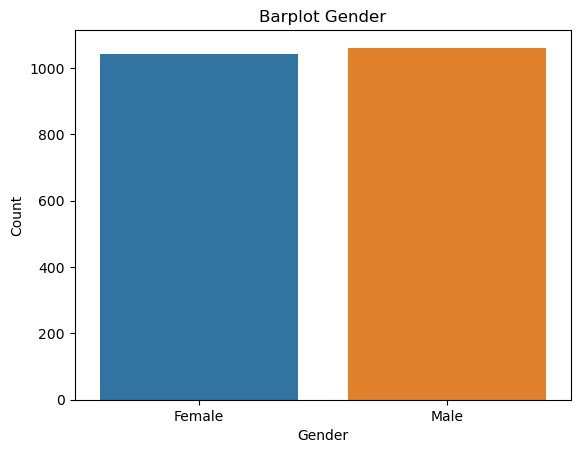

In [278]:
sns.countplot(x="Gender", data = df)
 
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Barplot Gender")
plt.show()

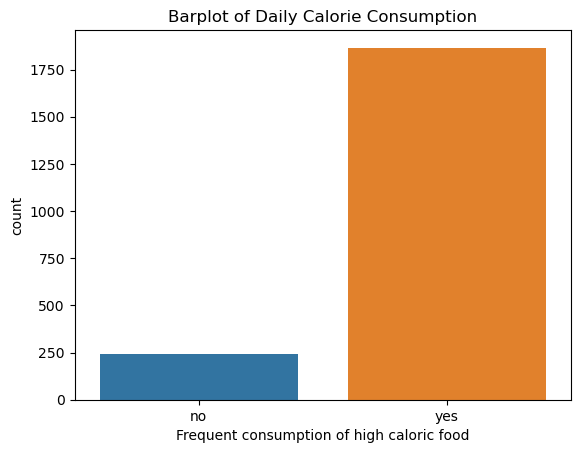

In [279]:
sns.countplot(x="FAVC", data = df)

plt.xlabel("Frequent consumption of high caloric food")
plt.ylabel("count")
plt.title("Barplot of Daily Calorie Consumption")
plt.show()

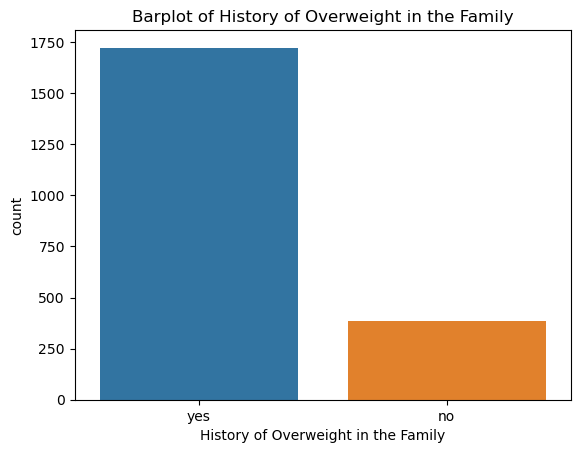

In [280]:
sns.countplot(x="family_history_with_overweight", data = df)
plt.xlabel("History of Overweight in the Family")
plt.ylabel("count")
plt.title("Barplot of History of Overweight in the Family")
plt.show()

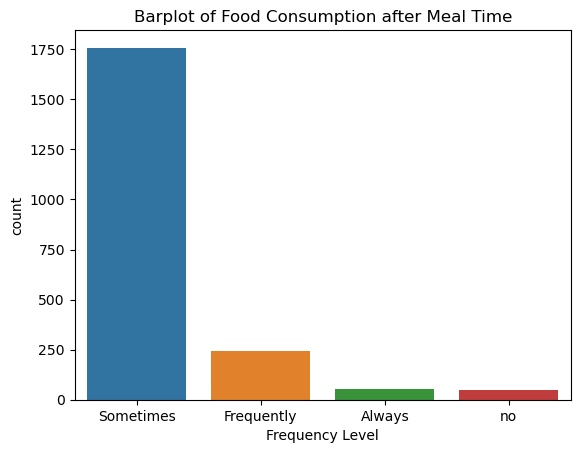

In [281]:
sns.countplot(x="CAEC", data = df)

plt.xlabel("Frequency Level")
plt.ylabel("count")
plt.title("Barplot of Food Consumption after Meal Time")
plt.show()

# Preprocessing

In [282]:
df.info()#To get the general info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [283]:
df.shape  #shape of the dataset

(2111, 17)

In [284]:
df.isna().sum() #finding null values

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

# Filling the null values

In [285]:
df['CAEC'].fillna(df['CAEC'].mode()[0], inplace=True) #filling the null values

In [286]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [287]:
df['MTRANS'].fillna(df['MTRANS'].mode()[0], inplace=True)

In [288]:
df['SCC'].fillna(df['SCC'].mode()[0], inplace=True)

In [289]:
df['CAEC'].fillna(df['CAEC'].mode()[0], inplace=True)

In [290]:
df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode()[0], inplace=True)

In [291]:
df['Height'] = df.groupby('Gender')['Height'].transform(lambda x: x.fillna(x.mean()))

In [292]:
df.isna().sum()  # checking again to see if there are any more null values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Encoding categorical values using lable encoder

In [293]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Splitting the x and Y dataset for training and testing

In [294]:
df1 = df.copy()
Y = df['NObeyesdad']
X = df.drop(columns = ['NObeyesdad'])

In [295]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [296]:
X_train.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
412,1,33.000000,1.850000,85.000000,0,1,2.000000,3.000000,1,0,2.000000,0,1.000000,0.000000,2,0
651,0,21.529439,1.592379,44.009450,0,0,3.000000,1.612747,1,0,2.566629,0,1.190465,0.000000,3,3
1460,1,23.000000,1.742500,105.028665,1,1,2.393837,3.000000,2,0,2.014990,0,0.978815,0.413220,2,3
1419,1,31.783524,1.672959,90.000000,1,1,2.949242,1.782109,2,0,2.210997,0,1.992719,0.000000,2,0
1433,0,22.307413,1.605495,82.528575,1,1,2.049112,2.622055,2,0,2.280555,0,2.052896,0.896185,3,3


In [297]:
X_test = np.array(X_test)

# Using kNN model

In [305]:
from sklearn.neighbors import KNeighborsClassifier 
model1=KNeighborsClassifier()
model1.fit(X_train,Y_train)
y_pred1=model1.predict(X_test)
y_pred1

C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_I',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_II',
       'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_I',
       'Normal_Weight', 'Obesity_Type_I', 'Normal_Weight',
       'Obesity_Type_I', 'Overweight_Level_I', 'Obesity_Type_III',
       'Overweight_Level_II', 'Overweight_Level_II', 'Obesity_Type_III',
       'Obesity_Type_I', 'Obesity_Type_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
       'Obesity_Type_I', 'Obesity_Type_I', 'Obesity_Type_II',
       'Overweight_Level_I', 'Normal_Weight', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Insufficient_Weight', 'Overweight_Level_I',
       'Insufficient_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Insufficient_Weight', 'Overweight_Level_II', 'Obesit

In [307]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix #for confusision matrix
from sklearn.metrics import ConfusionMatrixDisplay
accuracy1=accuracy_score(Y_test,y_pred1)
accuracy1

0.8706624605678234

# Using SVC Support Vector Classifier

In [300]:
from sklearn.svm import SVC #SVM

In [301]:
model2=SVC()
model2.fit(X_train,Y_train)
y_pred2=model2.predict(X_test)
y_pred2

C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_II',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_II',
       'Normal_Weight', 'Obesity_Type_III', 'Overweight_Level_II',
       'Obesity_Type_III', 'Obesity_Type_III', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_I', 'Normal_Weight',
       'Obesity_Type_III', 'Overweight_Level_I', 'Obesity_Type_III',
       'Overweight_Level_II', 'Overweight_Level_I', 'Obesity_Type_III',
       'Obesity_Type_III', 'Obesity_Type_III', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
       'Overweight_Level_II', 'Overweight_Level_II', 'Obesity_Type_III',
       'Overweight_Level_I', 'Normal_Weight', 'Overweight_Level_II',
       'Overweight_Level_II', 'Obesity_Type_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Insufficient_Weight', 'Normal_Weight',
       'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II',
       'Insufficient_Weight', 'Overweight_L

In [308]:
accuracy2=accuracy_score(Y_test,y_pred2)
accuracy2

0.6009463722397477

# kNN model is having higher accuracy than svc

In [309]:
report1=classification_report(y_pred1,Y_test)
print(report1)

                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.79      0.88       113
      Normal_Weight       0.53      0.82      0.64        56
     Obesity_Type_I       0.95      0.87      0.91       113
    Obesity_Type_II       0.97      0.96      0.96        91
   Obesity_Type_III       0.97      0.97      0.97       101
 Overweight_Level_I       0.80      0.79      0.80        82
Overweight_Level_II       0.84      0.88      0.86        78

           accuracy                           0.87       634
          macro avg       0.86      0.87      0.86       634
       weighted avg       0.89      0.87      0.88       634

